In [1]:
import json
from datetime import datetime

import numpy as np


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 39

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]
target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.00038012,  0.00030872, -0.0021129 ,  0.00033976], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00016477,  0.00152826, -0.00122418,  0.00184399], dtype=float32)}

 23%|██▎       | 17/75 [03:19<12:02, 12.46s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
76it [16:46, 13.24s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-12-13 15:55:54.767868\nTime taken: 0:16:54.274662\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.3801 mm\n    sigma_x =  0.3087 mm\n    mu_y    = -2.1105 mm\n    sigma_y =  0.3418 mm\n\nBeam after:\n    mu_x    = -0.4515 mm\n    sigma_x =  0.1269 mm\n    mu_y    =  0.5726 mm\n    sigma_y =  0.5174 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.4515 mm\n    |delta_sigma_x| =  0.1269 mm\n    |delta_mu_y|    =  0.5726 mm\n    |delta_sigma_y| =  0.5174 mm\n    \n    MAE =  0.4171 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -0.0000 1/m^2\n    AREAMQZM2 strength =  -3.6000 1/m^2\n    AREAMCVM1 kick     = 

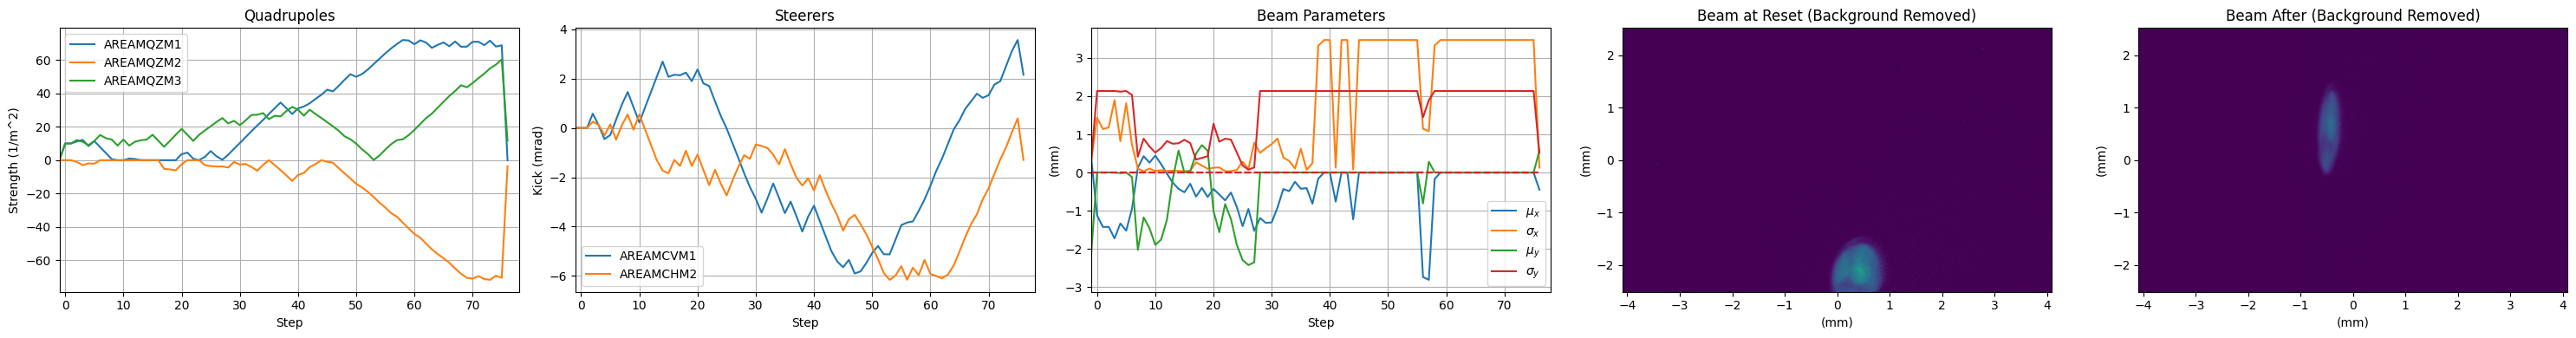

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=75,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.00040668,  0.00030872, -0.00216428,  0.00029612], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00066626,  0.00030699,  0.00045476,  0.00167823], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 50/50 [08:32<00:00, 10.25s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-12-13 16:48:47.049574\nTime taken: 0:08:37.544340\nNo. of steps: 50\n\nBeam before:\n    mu_x    =  0.3934 mm\n    sigma_x =  0.3059 mm\n    mu_y    = -2.1692 mm\n    sigma_y =  0.2920 mm\n\nBeam after:\n    mu_x    = -0.8183 mm\n    sigma_x =  0.2805 mm\n    mu_y    =  1.4608 mm\n    sigma_y =  0.3366 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0033 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.2112 mm\n    |delta_sigma_x| =  0.2731 mm\n    |delta_mu_y|    =  0.1116 mm\n    |delta_sigma_y| =  0.2814 mm\n    \n    MAE =  0.2193 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   8.7945 1/m^2\n    AREAMQZM2 strength = -12.7825 1/m^2\n    AREAMCVM1 kick 

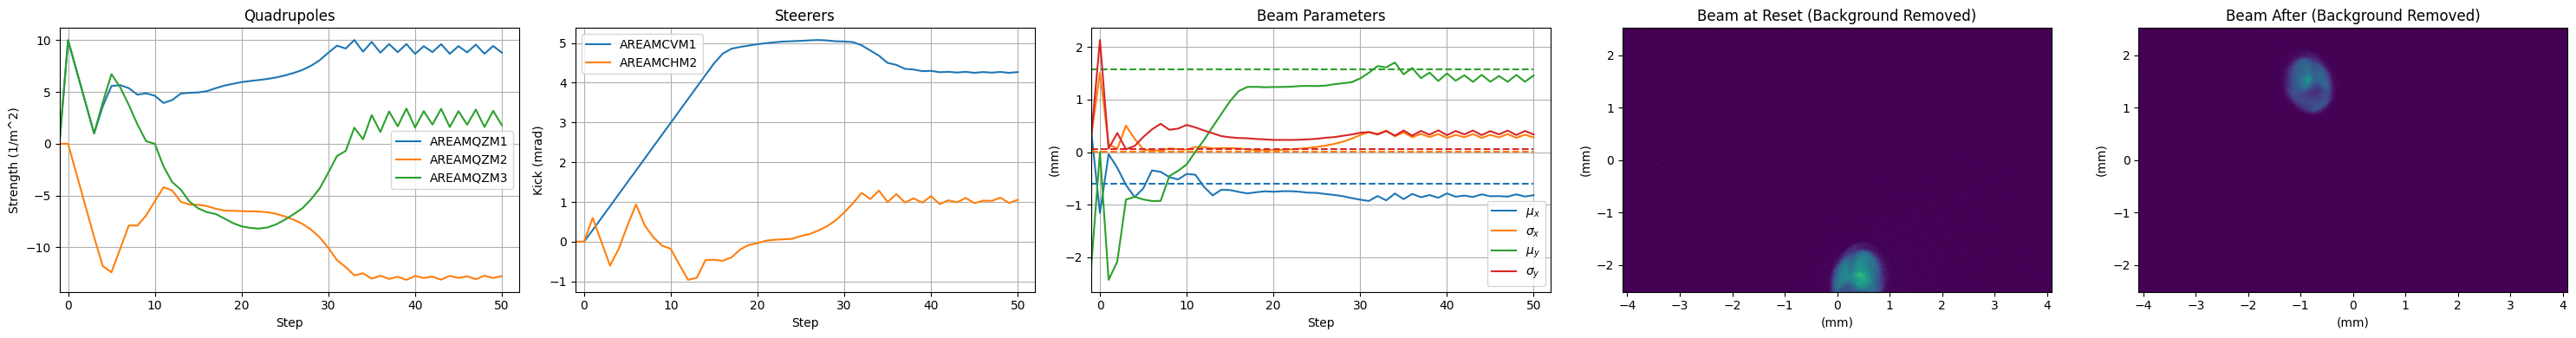

In [5]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [6]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()

In [7]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [8]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

{'beam': array([ 0.00041663,  0.00030308, -0.00212391,  0.00033041], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.8285231e-03,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00159076,  0.0009041 , -0.00096274,  0.00186204], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
 20%|██        | 10/50 [01:35<06:11,  9.29s/it]

BO is taking over


51it [18:43, 22.03s/it]                         


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996 taken over by BO after 10 steps if MAE > 0.00015\nStart time: 2022-12-13 16:58:22.918441\nTime taken: 0:18:48.963249\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.3967 mm\n    sigma_x =  0.3059 mm\n    mu_y    = -2.1264 mm\n    sigma_y =  0.3283 mm\n\nBeam after:\n    mu_x    = -0.8947 mm\n    sigma_x =  0.1057 mm\n    mu_y    =  1.8119 mm\n    sigma_y =  0.0634 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0033 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.2876 mm\n    |delta_sigma_x| =  0.0983 mm\n    |delta_mu_y|    =  0.2395 mm\n    |delta_sigma_y| =  0.0081 mm\n    \n    MAE =  0.1584 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.9600 1/m^2\n    AREAMQZ

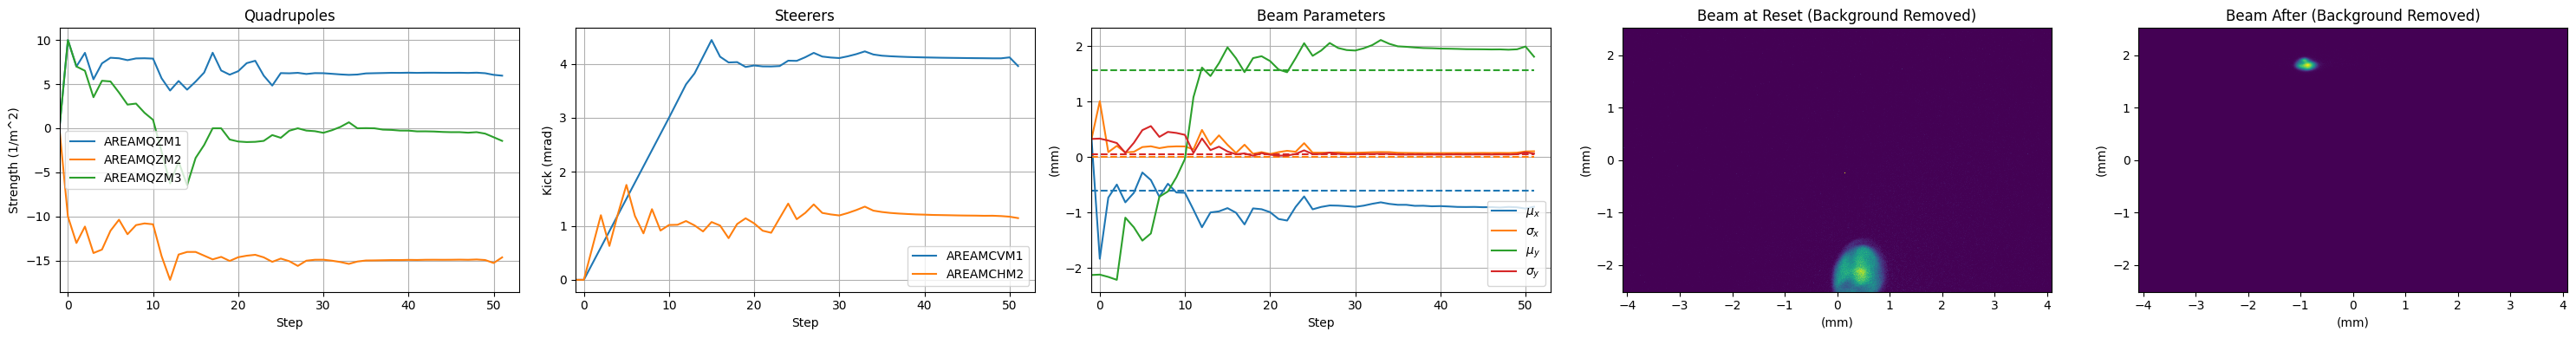

In [9]:
# Reinforcement Learning with BO takeover
from ea_rlbo import optimize_donkey_bo_combo

bo_takeover = 0.00015

optimize_donkey_bo_combo(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="UCB",
    rl_steps=10,
    bo_takeover=bo_takeover,
    beta=0.01,
    stepsize=0.05,
)